In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [20]:
housingDataImputed = pd.read_csv('./imputeImpl2a_cat_housingData.csv',index_col = 0, na_filter = False)

numeric_features=list(housingDataImputed.select_dtypes(include=[np.number]).columns.values)
cat_features=list(housingDataImputed.select_dtypes(exclude=[np.number]).columns.values)
numeric_features.remove('SalePrice')
numeric_features.remove('PID')
X_vars = numeric_features 
Y_var = ['SalePrice']

X=housingDataImputed[X_vars]
y=housingDataImputed[Y_var]

XTrain,XTest,ytrain,ytest = train_test_split(X,y)
numeric_features

['GrLivArea',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'OldHouse',
 'BuiltInGarage',
 'central_air',
 'GoodKitchen',
 'WalkoutBasement',
 'BasementQuality',
 'StreetType',
 'LandContourHLS',
 'PubUtilities',
 'GreatLocation1',
 'GreatLocation2',
 'GoodRoofMat',
 'GoodExterior1',
 'GoodExterior2',
 'GoodExteriorQual',
 'LivableBasement1',
 'LivableBasement2',
 'GasHeating',
 'HeatingQuality',
 'AirConditioning',
 'FunctionDeduction',
 'FireplaceQuality',
 'GarageFinished',
 'GoodGarage',
 'GoodPool

In [16]:
def check_empty_vals():
    cols=housingDataImputed.columns
    for col in cols:
        null_count=pd.isnull(housingDataImputed[col]).sum()
        if null_count>0:
            print(col,null_count)
        
        
check_empty_vals()

In [63]:
housingDataImputed['MSSubClass'].unique()

array([ 30, 120,  70,  60,  85,  20, 180,  80, 160,  50,  90,  75,  45,
        40, 190, 150])

In [26]:
lasso=Lasso()
lasso.set_params(alpha=6, max_iter=10000, normalize=True)
lasso.fit(XTrain,ytrain)
lassoCoef = pd.Series(lasso.coef_, index=numeric_features)
sortedCoefs = np.abs(lassoCoef).sort_values(ascending=False)
sortedCoefs

GreatLocation2      96785.939337
GoodExteriorQual    64691.869798
GoodRoofMat         61386.075341
GoodPool            40854.433128
PubUtilities        28617.655366
                        ...     
BsmtHalfBath            0.000000
FullBath                0.000000
MiscVal                 0.000000
3SsnPorch               0.000000
NewHome                 0.000000
Length: 63, dtype: float64

/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34829033008.48303, tolerance: 1053631355.2840711
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Change of Lasso Intercept Varying Alpha')

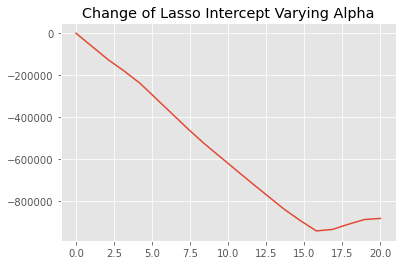

In [22]:
coefs = []
intercepts = []
R2  = []
alphaRange = np.linspace(1e-3,20,20)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha, normalize = True, max_iter=100000)  
    lasso.fit(XTrain, ytrain)
    intercepts.append(lasso.intercept_)
    coefs.append(lasso.coef_)
    R2.append(lasso.score(XTrain, ytrain))
plt.plot(alphaRange, intercepts)
plt.title('Change of Lasso Intercept Varying Alpha')

/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34831339684.89514, tolerance: 1053631355.2840711
  model = cd_fast.enet_coordinate_descent(


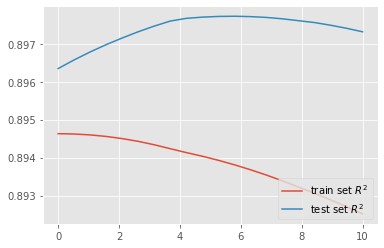

In [24]:
train_R2 = []
test_R2  = []
alphaRange = np.linspace(0.001,10,20)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha, max_iter=10000)  
    lasso.fit(XTrain, ytrain)
    train_R2.append(lasso.score(XTrain, ytrain))
    test_R2.append(lasso.score(XTest, ytest))
plt.plot(alphaRange, train_R2, label=r'train set $R^2$')
plt.plot(alphaRange, test_R2, label=r'test set $R^2$')
plt.legend(loc=4)

In [25]:
alphas = np.linspace(0.0001,10,100)
params2 = [{'alpha': alphas}]
grid2=GridSearchCV(estimator=lasso,param_grid=params2, return_train_score=True)
grid2.fit(XTrain,ytrain)
print(grid2.best_params_)
print(grid2.score(XTest,ytest))

/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27851186392.618286, tolerance: 832991629.1154729
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26959887618.98767, tolerance: 826860540.3296851
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22087418096.6864, tolerance: 866672746.2889842
  model = cd_fast.enet_coordinate_descent(
/Users/chitrasharathchandra/

{'alpha': 6.060645454545455}
0.89772072862654


In [112]:
housingDataImputed

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,DesirableNeighborhood
0,909176150,856,126000,30,RL,58.77,7890,Pave,Reg,Lvl,...,0,NA,NA,0,0,3,2010,WD,Normal,0
1,905476230,1049,139500,120,RL,42.00,4235,Pave,Reg,Lvl,...,0,NA,NA,0,0,2,2009,WD,Normal,0
3,535377150,1039,114000,70,RL,80.00,8146,Pave,Reg,Lvl,...,0,NA,NA,0,0,5,2009,WD,Normal,0
4,534177230,1665,227000,60,RL,70.00,8400,Pave,Reg,Lvl,...,0,NA,NA,0,0,11,2009,WD,Normal,0
5,908128060,1922,198500,85,RL,64.00,7301,Pave,Reg,Lvl,...,0,NA,NA,0,0,7,2009,ConLD,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,903205040,952,121000,30,RL,55.95,8854,Pave,Reg,Lvl,...,0,NA,NA,0,0,5,2009,WD,Normal,0
2576,905402060,1733,139600,20,RL,65.49,13680,Pave,IR1,Lvl,...,0,NA,NA,0,0,6,2009,WD,Normal,0
2577,909275030,2002,145000,90,RH,82.00,6270,Pave,Reg,HLS,...,0,NA,NA,0,0,8,2007,WD,Normal,0
2578,907192040,1842,217500,60,RL,69.98,8826,Pave,Reg,Lvl,...,0,NA,NA,0,0,7,2007,WD,Normal,0


In [11]:
desirable_neighborhoods=["StoneBr","NridgHt","NoRidge"]   
housingDataImputed['DesirableNeighborhood']=housingDataImputed.Neighborhood.map(lambda t:1 if t in desirable_neighborhoods else 0)
housingDataImputed['BuiltInGarage']=housingDataImputed.GarageType.map(lambda t:1 if t in ['Attchd','BuiltIn'] else 0)
housingDataImputed['central_air']=housingDataImputed.GarageType.map(lambda t:1 if t=="Yes" else 0)
housingDataImputed['GoodKitchen']=housingDataImputed.GarageType.map(lambda t:1 if t in ['Excellent','Good'] else 0)
housingDataImputed['WalkoutBasement']=housingDataImputed.BsmtExposure.map(lambda t:1 if t in ['Good Exposure','Average Exposure'] else 0)
housingDataImputed['BasementQuality']=housingDataImputed.BsmtQual.map(lambda t:1 if t in ['Ex','Gd'] else 0)
housingDataImputed['StreetType']=housingDataImputed.Street.map(lambda t:1 if t=="Pave" else 0)
housingDataImputed['LandContourHLS']=housingDataImputed.LandContour.map(lambda t:1 if t=="HLS" else 0)
housingDataImputed['PubUtilities']=housingDataImputed.Utilities.map(lambda t:1 if t=="AllPub" else 0)
housingDataImputed['GreatLocation1']=housingDataImputed.Condition1.map(lambda t:1 if t in ['PosN','PosA'] else 0)
housingDataImputed['GreatLocation2']=housingDataImputed.Condition2.map(lambda t:1 if t in ['PosN','PosA'] else 0)
housingDataImputed['GoodRoofMat']=housingDataImputed.RoofMatl.map(lambda t:1 if t in ['WdShngl','Membran'] else 0)
housingDataImputed['GoodExterior1']=housingDataImputed.Exterior1st.map(lambda t:1 if t in ['ImStucc','PreCast'] else 0)
housingDataImputed['GoodExterior2']=housingDataImputed.Exterior2nd.map(lambda t:1 if t in ['ImStucc','PreCast'] else 0)
housingDataImputed['GoodExteriorQual']=housingDataImputed.ExterQual.map(lambda t:1 if t=="Ex" else 0)
housingDataImputed['LivableBasement1']=housingDataImputed.BsmtFinType1.map(lambda t:1 if t=="GLQ" else 0)
housingDataImputed['LivableBasement2']=housingDataImputed.BsmtFinType2.map(lambda t:1 if t=="GLQ" else 0)
housingDataImputed['GasHeating']=housingDataImputed.Heating.map(lambda t:1 if t in ['GasA','GasW'] else 0)
housingDataImputed['HeatingQuality']=housingDataImputed.HeatingQC.map(lambda t:1 if t in ['Ex','Gd'] else 0)
housingDataImputed['AirConditioning']=housingDataImputed.CentralAir.map(lambda t:1 if t=="Y" else 0)
housingDataImputed['FunctionDeduction']=housingDataImputed.Functional.map(lambda t:1 if t=="Typ" else 0)
housingDataImputed['FireplaceQuality']=housingDataImputed.FireplaceQu.map(lambda t:1 if t in ['Ex','Gd'] else 0)
housingDataImputed['GarageFinished']=housingDataImputed.GarageFinish.map(lambda t:1 if t=="Fin" else 0)
housingDataImputed['GoodGarage']=housingDataImputed.GarageQual.map(lambda t:1 if t in ["Ex","Gd"] else 0)
housingDataImputed['GoodPool']=housingDataImputed.PoolQC.map(lambda t:1 if t in ["Ex","Gd"] else 0)
housingDataImputed['NewHome']=housingDataImputed.GarageQual.map(lambda t:1 if t=="New" else 0)

In [117]:
housingDataImputed.corr().to_csv("cat_cor.csv")

In [28]:
#"OverallQual","DesirableNeighborhood","GarageArea","GrLivArea","TotalBsmtSF",'BuiltInGarage',"GoodKitchen"
# "OverallQual","DesirableNeighborhood","GarageArea","GrLivArea","TotalBsmtSF",'BuiltInGarage',"GoodKitchen","WalkoutBasement","BasementQuality","MasVnrArea"
vif_numeric_features=["OverallQual","GarageArea","GrLivArea","TotalBsmtSF",
                      'BuiltInGarage',"GoodKitchen","WalkoutBasement","BasementQuality","TotRmsAbvGrd","HeatingQuality"]

Y_var = ['SalePrice']

X_vif=housingDataImputed[vif_numeric_features]
y_vif=np.log(housingDataImputed[Y_var])

XvTrain,XvTest,yvtrain,yvtest = train_test_split(X_vif,y_vif)
ols=LinearRegression()
ols.fit(XvTrain,yvtrain)
print(ols.score(XvTrain,yvtrain))
print(ols.score(XvTest,yvtest))

0.8406596072501671
0.8675943754274045


In [32]:
vif2_num_cat_features=["OverallQual","GarageArea","GrLivArea","TotalBsmtSF","3SsnPorch","GoodGarage","GoodRoofMat","LandContourHLS","GreatLocation1","GoodExterior1","ScreenPorch",
                       "GoodExterior2","GreatLocation2","BsmtHalfBath","LivableBasement2","MiscVal","EnclosedPorch",
                       "MiscFeature","GoodExteriorQual","GoodPool","PoolArea","GarageFinished","OpenPorchSF",
                       "WoodDeckSF","MasVnrArea","FireplaceQuality","LivableBasement1",
                       "HalfBath","LotArea","Fireplaces","BsmtFullBath","HeatingQuality","MSSubClass"]
X_vif2=housingDataImputed[vif2_num_cat_features]
y_vif2=np.log(housingDataImputed[Y_var])

Xv2Train,Xv2Test,yv2train,yv2test = train_test_split(X_vif2,y_vif2)
ols.fit(Xv2Train,yv2train)
print(ols.score(Xv2Train,yv2train))
print(ols.score(Xv2Test,yv2test))

0.87285664530157
0.8617206295538655
